In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow_hub as hub
import tensorflow as tf
import imutils

In [2]:
def plt_imshow(title,image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()


In [3]:
IMAGE_PATH = '/content/runners.jpg'
LABELS = ['','person','bicycle','car','motorcycle']


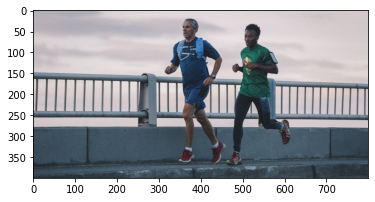

In [4]:
# preprocessing image 

image = cv2.imread(IMAGE_PATH)

image = imutils.resize(image,800)

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)


In [5]:
# converting to tensors for inserting into model

image_tensor = tf.convert_to_tensor(rgb , dtype=tf.uint8)

image_tensor = tf.expand_dims(image_tensor, axis=0)

image_tensor

<tf.Tensor: shape=(1, 400, 800, 3), dtype=uint8, numpy=
array([[[[180, 175, 182],
         [179, 174, 181],
         [174, 169, 176],
         ...,
         [211, 202, 203],
         [212, 203, 204],
         [210, 201, 202]],

        [[179, 174, 181],
         [180, 175, 182],
         [178, 173, 180],
         ...,
         [210, 201, 202],
         [208, 199, 200],
         [210, 201, 202]],

        [[181, 176, 183],
         [180, 175, 182],
         [178, 173, 180],
         ...,
         [212, 203, 204],
         [210, 201, 202],
         [210, 201, 202]],

        ...,

        [[ 44,  54,  63],
         [ 40,  50,  59],
         [ 45,  55,  64],
         ...,
         [ 62,  73,  82],
         [ 57,  69,  77],
         [ 58,  71,  79]],

        [[ 39,  48,  55],
         [ 41,  50,  57],
         [ 48,  57,  64],
         ...,
         [ 53,  66,  75],
         [ 52,  66,  75],
         [ 54,  68,  77]],

        [[ 43,  52,  59],
         [ 40,  49,  56],
         [ 43,  52

In [ ]:
# loading Mask RCNN model from tensorflow

detector = hub.load("https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1")


In [ ]:
# running model

detector_output = detector(image_tensor)

In [ ]:
detector_output.keys()

In [ ]:
# fetching outputs

classes = detector_output["detection_classes"].numpy()[0].astype(int)
masks = detector_output["detection_masks"].numpy()[0]
boxes = detector_output["detection_boxes"].numpy()[0]
scores = detector_output["detection_scores"].numpy()[0]


In [ ]:
clone = rgb.copy()

(H,W) = rgb.shape[:2]

box = (boxes*np.array([H,W,H,W])).astype(int)

masks = (masks*255).astype("uint8")

# print(box)

for score, (ymin,xmin,ymax,xmax), label, mask in zip(scores,box,classes,masks):

  if score >0.8:

    # object detection - boxes
    img = cv2.rectangle(clone , (xmin,ymin), (xmax,ymax), (0,0,255),3)
    text = "{}: - {:.4f}".format(LABELS[label],score)
    img = cv2.putText( img, text, (xmin,ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.40, (0,0,255),2)

    # image segmentation - masks

    roi = clone[ymin:ymax,xmin:xmax]


    roi_height = ymax - ymin
    roi_width = xmax - xmin

    masking = cv2.resize(mask,(roi_width, roi_height),interpolation=cv2.INTER_NEAREST)
    instance = cv2.bitwise_and(roi,roi,mask=masking)

    roi_mask = roi[masking]
    blend = ((0.4*np.array([255,0,0]).astype(int)) + (0.6*roi_mask)).astype("uint8")

    
    img[ymin:ymax,xmin:xmax]=blend



    



In [ ]:
# cv2_imshow(img)
plt_imshow("",img)